### Description de la base de données à explorer

 '''Le jeu de données des passagers du Titanic fournit des informations sur les passagers qui étaient à bord du RMS Titanic lors de son voyage inaugural tragique.
Le jeu de données comprend les colonnes suivantes :

PassengerId : Identifiant unique pour chaque passager.
Survived : Statut de survie du passager (0 = Non survécu, 1 = Survécu).
Pclass : Classe du passager (1 = Première classe, 2 = Deuxième classe, 3 = Troisième classe).
Sex : Sexe du passager.
Age : Âge du passager.
SibSp : Nombre de frères et sœurs/conjoints à bord du Titanic.
Parch : Nombre de parents/enfants à bord du Titanic.
Fare : Tarif payé par le passager.
Embarked : Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).
Nous allons travailler sur 889 lignes et 9 colonnes.'''







#### 1 - Chargement des bibliothèques et du fichier
#### 2 - Comprendre la structure des données
#### 3 - Nettoyage des données
#### 4 - Analyse univariée
#### 5 - Analyse bivariée
#### 6 - Analyse multivariée

### Problématiques à résoudre :
###### - Information sur le dataframe - Statistiques descriptives
###### - Vérifier les valeurs manquantes
###### - Histogramme pour l'âge - Répartition des passagers par classe
###### - Répartition des passagers par sexe - Taux de survie par classe
###### - Taux de survie par sexe - Taux de survie par âge
###### - Pairplot des principales variables - Heatmap des corrélations

### 1 - Chargement des bibliothèques et du fichier CSV

In [40]:
# Importons les librairies nécessaire
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mno 

# Afficher notre DataFrame
df = pd.read_csv('titanic.csv')

In [41]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
5,6,0,3,Male,60.0,0,0,8.4583,2
6,7,0,1,Male,54.0,0,0,51.8625,3
7,8,0,3,Male,2.0,3,1,21.0750,3
8,9,1,3,female,27.0,0,2,11.1333,3
9,10,1,2,female,14.0,1,0,30.0708,1


In [42]:
df.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
879,882,0,3,Male,33.0,0,0,7.8958,3
880,883,0,3,female,22.0,0,0,10.5167,3
881,884,0,2,Male,28.0,0,0,10.5000,3
882,885,0,3,Male,25.0,0,0,7.0500,3
883,886,0,3,female,39.0,0,5,29.1250,2
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1
888,891,0,3,Male,32.0,0,0,7.7500,2


### 2 - Comprendre la structure des données

In [43]:
df.shape

(889, 9)

In [44]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

'''PassengerId : IdentifiantPassager
Survived : Survécu
Pclass : Classe
Sex : Sexe
Age : Âge
SibSp : FrèresSœurs/Conjoints
Parch : Parents/Enfants
Fare : Tarif
Embarked : PortEmbarquement'''

In [45]:
# Information sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


''' Notre base de données n'a pas de valeurs manquantes nous avons 889 valeurs non-null sur l'ensemble de nos 9 colonnes. Et notre dataset a une colonne de type catégorielle, deux colonnes de type flottant et six colonnes de type entier. ''' 

In [46]:
# Statistiques descriptives
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,NaN
mean,446.000000,0.382452,2.311586,NaN,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,NaN,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,NaN,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,NaN,54.000000,1.000000,0.000000,31.000000,3.000000


#### Interprétation de l'analyse descriptive du jeu de données des passagers du Titanic

L'analyse descriptive fournie donne un aperçu statistique des différentes colonnes du jeu de données des passagers du Titanic. Voici une interprétation détaillée :

#### Nombre de valeurs (`count`)

- **PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked** : Chaque colonne contient 889 entrées non nulles, ce qui signifie qu'il y a des données pour 889 passagers.

#### Valeurs uniques (`unique`)

- **Sex** : Il y a 2 valeurs uniques dans cette colonne, correspondant probablement à "male" et "female".

#### Valeur la plus fréquente (`top`) et sa fréquence (`freq`)

- **Sex** : La valeur la plus fréquente est "male" (homme), et cette valeur apparaît 577 fois.

#### Moyenne (`mean`)

- **PassengerId** : La moyenne des identifiants des passagers est de 446. 
- **Survived** : Le taux moyen de survie est de 0.382 (38.2% des passagers ont survécu).
- **Pclass** : La classe moyenne des passagers est 2.31, indiquant que la plupart des passagers se trouvaient en deuxième ou troisième classe.
- **Age** : L'âge moyen des passagers est de 35.69 ans.
- **SibSp** : Le nombre moyen de frères et sœurs/conjoints à bord est de 0.52.
- **Parch** : Le nombre moyen de parents/enfants à bord est de 0.38.
- **Fare** : Le tarif moyen payé par les passagers est de 32.10.
- **Embarked** : La moyenne est de 2.54, correspondant probablement à une codification des ports d'embarquement.

#### Écart type (`std`)

- **PassengerId** : L'écart type est de 256.99, indiquant une grande dispersion des identifiants.
- **Survived** : L'écart type est de 0.49, proche de celui d'une distribution binaire (0 ou 1).
- **Pclass** : L'écart type est de 0.83, montrant une certaine diversité dans les classes des passagers.
- **Age** : L'écart type est de 17.76, indiquant une large dispersion des âges.
- **SibSp** : L'écart type est de 1.10, montrant une dispersion dans le nombre de frères et sœurs/conjoints à bord.
- **Parch** : L'écart type est de 0.81, montrant une dispersion dans le nombre de parents/enfants à bord.
- **Fare** : L'écart type est de 49.70, montrant une large dispersion des tarifs payés.
- **Embarked** : L'écart type est de 0.79, correspondant à une codification des ports d'embarquement.

#### Valeurs minimales (`min`), quartiles (`25%`, `50%`, `75%`) et maximales (`max`)

- **PassengerId** : Les identifiants vont de 1 à 891.
- **Survived** : Les valeurs vont de 0 (non survécu) à 1 (survécu).
- **Pclass** : Les classes vont de 1 (première classe) à 3 (troisième classe).
- **Age** : Les âges vont de 0.42 à 80 ans.
- **SibSp** : Le nombre de frères et sœurs/conjoints va de 0 à 8.
- **Parch** : Le nombre de parents/enfants va de 0 à 6.
- **Fare** : Les tarifs vont de 0 à 512.33.
- **Embarked** : Les valeurs vont de 1 à 3, correspondant probablement à Cherbourg (C), Queenstown (Q) et Southampton (S).

#### Quartiles

- **PassengerId** : 25% des passagers ont un identifiant inférieur ou égal à 224, 50% ont un identifiant inférieur ou égal à 446, et 75% ont un identifiant inférieur ou égal à 668.
- **Survived** : 25% des passagers n'ont pas survécu, et 75% ont survécu.
- **Pclass** : 25% des passagers étaient en première ou deuxième classe, 50% étaient en troisième classe, et 75% étaient également en troisième classe.
- **Age** : 25% des passagers avaient 22 ans ou moins, 50% avaient 32 ans ou moins, et 75% avaient 54 ans ou moins.
- **SibSp** : 25%, 50%, et 75% des passagers n'avaient aucun frère/sœur ou conjoint à bord.
- **Parch** : 25%, 50%, et 75% des passagers n'avaient aucun parent/enfant à bord.
- **Fare** : 25% des passagers ont payé un tarif de 7.90 ou moins, 50% ont payé 14.45 ou moins, et 75% ont payé 31.00 ou moins.
- **Embarked** : Les valeurs des ports d'embarquement montrent que la majorité des passagers ont embarqué à Southampton (S).


### 3 - Nettoyage des données

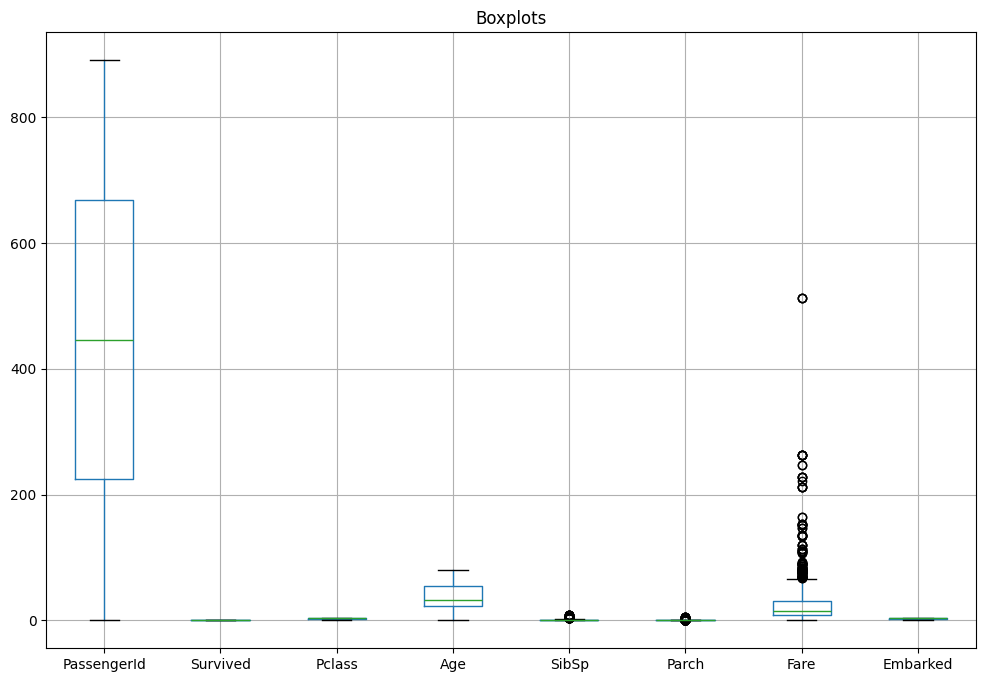

In [47]:
# Vérification des valeurs abérrantes
df.boxplot(figsize=(10, 8))
plt.title('Boxplots')
plt.show()

C:\Users\KEPHRENE\AppData\Local\Temp\ipykernel_9904\3292305230.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound


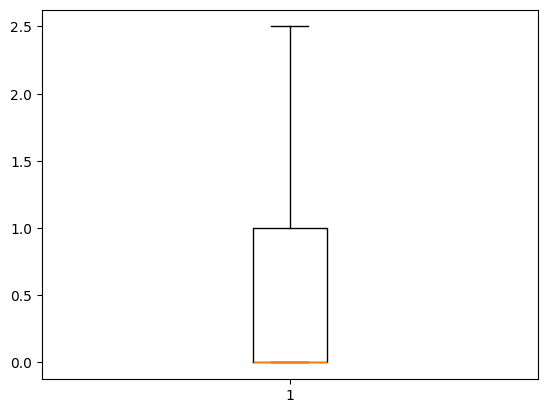

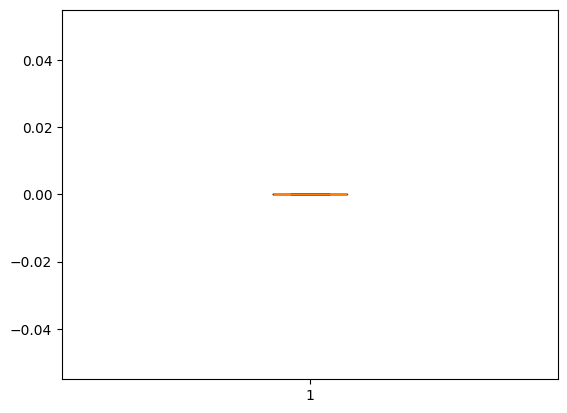

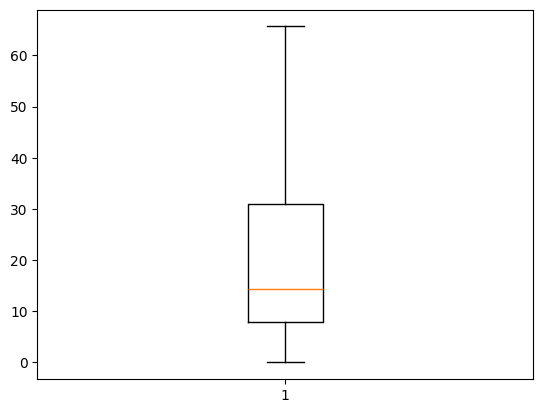

In [48]:
# Traitement des outliers
# Mise en place d'un feature des colonnes à traiter
features = ['SibSp', 'Parch', 'Fare']

def impute_outliers(df, feature):  
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df.loc[df[feature] < lower_bound, feature] = lower_bound 
    df.loc[df[feature] > upper_bound, feature] = upper_bound

# Remplaçons colonne par colonne les valeurs aberrantes de notre feature
for feature in features:  
    impute_outliers(df, feature)
    plt.boxplot(df[feature])
    plt.show()

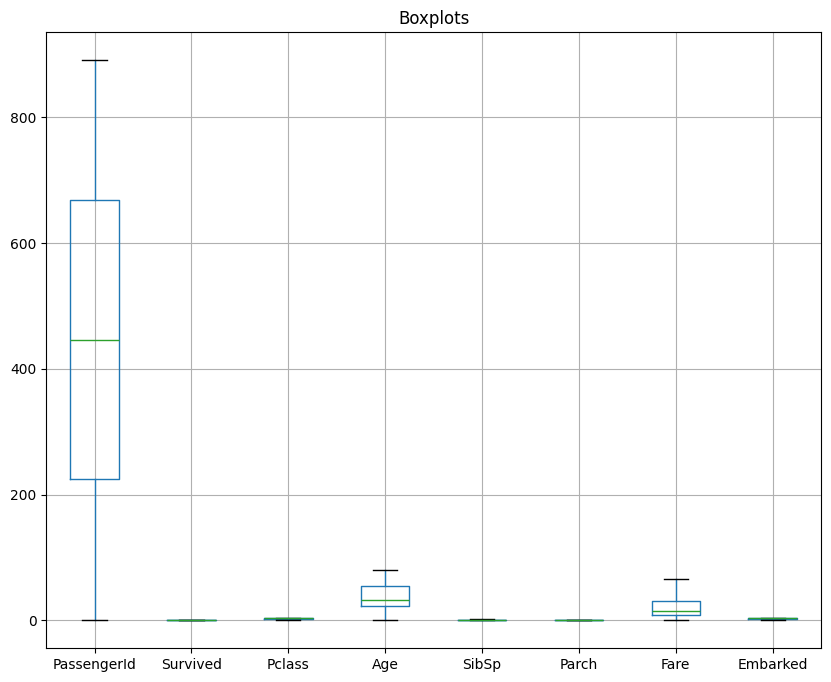

In [49]:
df.boxplot(figsize=(10, 8))
plt.title('Boxplots')
plt.show()

###### Tous les outliers ont étés traités par la méthode de pourcentage.

### 4 - Analyse univariée

###### Analysez la distribution des variables individuelles


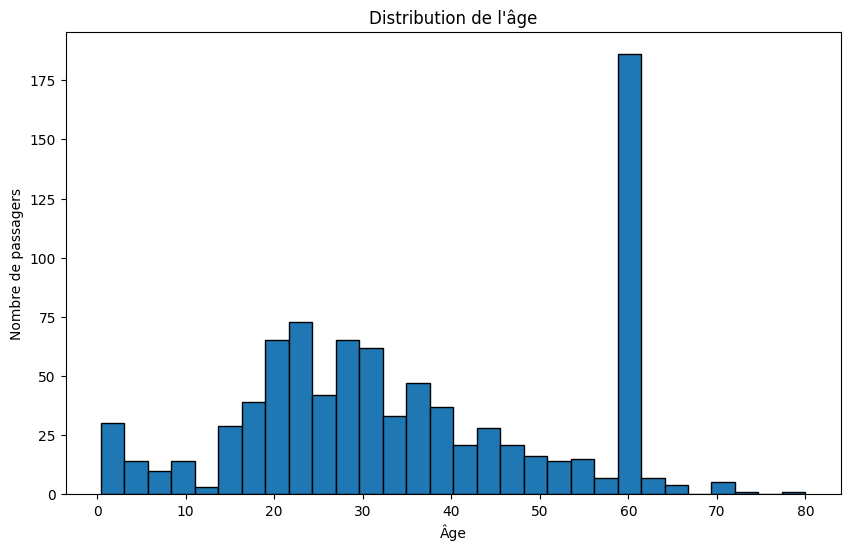

In [50]:
# Histogramme pour l'âge
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.show()


''' L'âge le plus représentatif est 60 ans, l'âge le moins représentatif est 80 ans '''

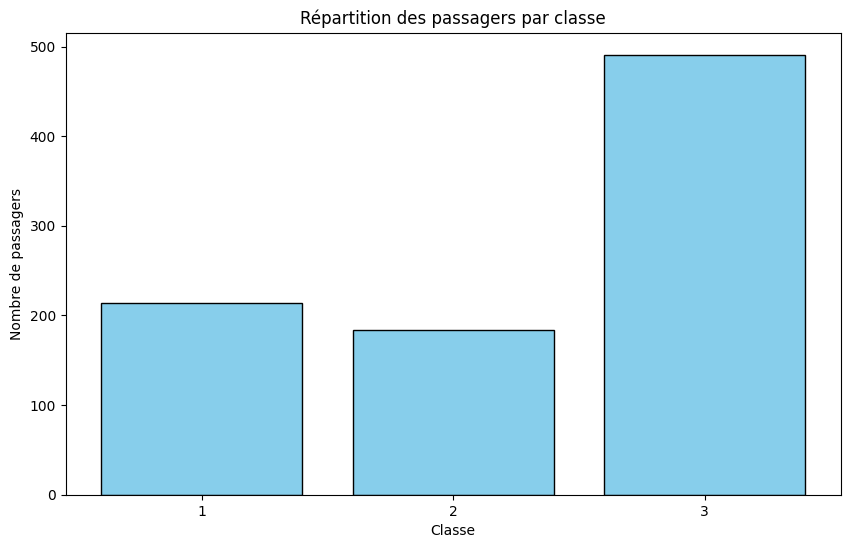

In [51]:
# Calculer la répartition des passagers par classe
class_counts = df['Pclass'].value_counts().sort_index()

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')
plt.title('Répartition des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.xticks(class_counts.index)
plt.show()


''' nous avons plus de passagers en classe 3 qu'en classe 1 et classe 2.''' 

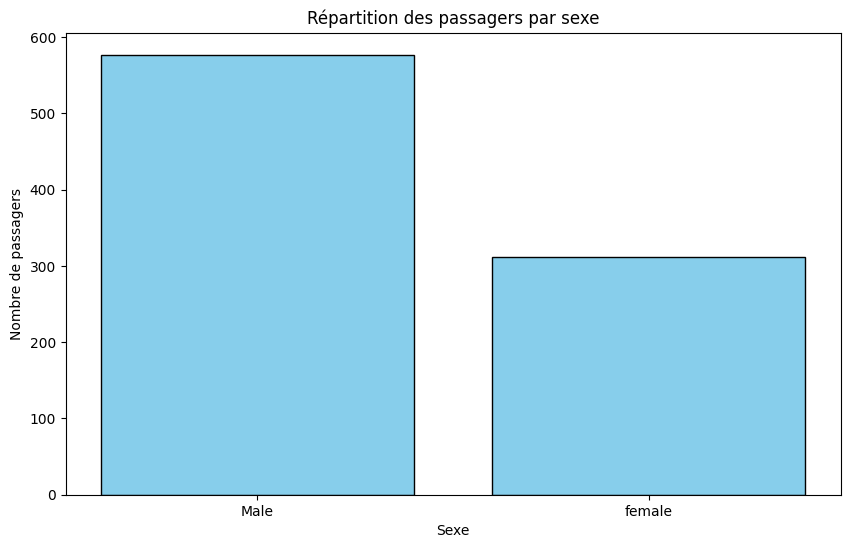

In [52]:
# Calculer la répartition des passagers par sexe
sex_counts = df['Sex'].value_counts().sort_index()

# Répartition des passagers par sexe
plt.figure(figsize=(10, 6))
plt.bar(sex_counts.index, sex_counts.values, color='skyblue', edgecolor='black')
plt.title('Répartition des passagers par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.xticks(sex_counts.index)
plt.show()

''' Nous avons plus d'hommes que de femmes à bord du Titanic.'''

### 5 - Analyse bivariée
###### Analysez la relation entre deux variables :

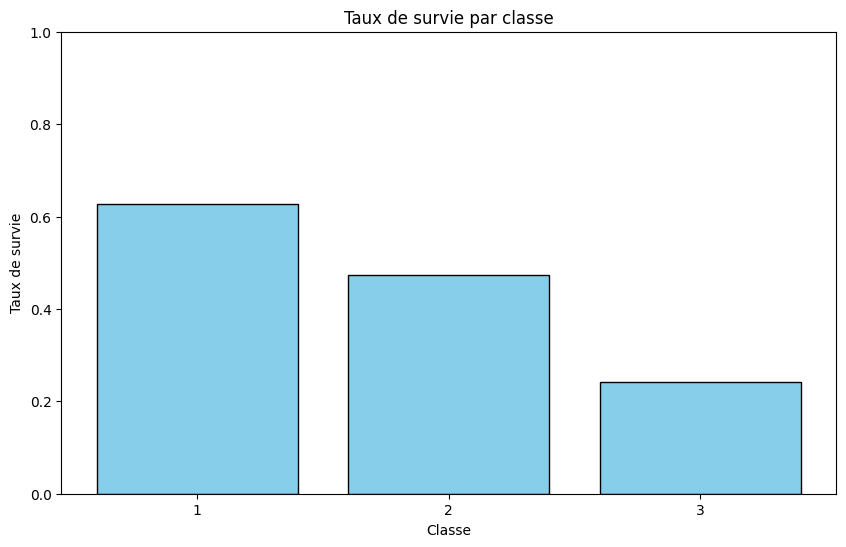

In [53]:
# Calculer le taux de survie par classe
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(survival_rate_by_class.index, survival_rate_by_class.values, color='skyblue', edgecolor='black')
plt.title('Taux de survie par classe')
plt.xlabel('Classe')
plt.ylabel('Taux de survie')
plt.xticks(survival_rate_by_class.index)
plt.ylim(0, 1)  # Les taux de survie sont entre 0 et 1
plt.show()

''' Nous avons plus de survivant en classe 1, suivie de la classe 2 et en fin la classe 3.'''

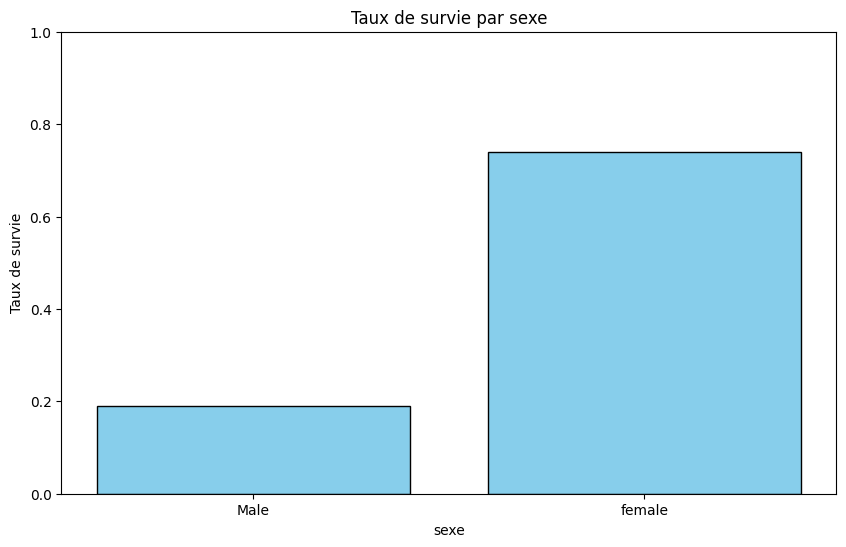

In [54]:
# Calculer le taux de survie par classe
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()

# Créer le graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color='skyblue', edgecolor='black')
plt.title('Taux de survie par sexe')
plt.xlabel('sexe')
plt.ylabel('Taux de survie')
plt.xticks(survival_rate_by_sex.index)
plt.ylim(0, 1)  # Les taux de survie sont entre 0 et 1
plt.show()

''' Les femmes ont survécues par rapport aux hommes.'''

In [55]:
# Créer des bins pour les âges
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Calculer le taux de survie par groupe d'âge
survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()

C:\Users\KEPHRENE\AppData\Local\Temp\ipykernel_9904\2079815578.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean()


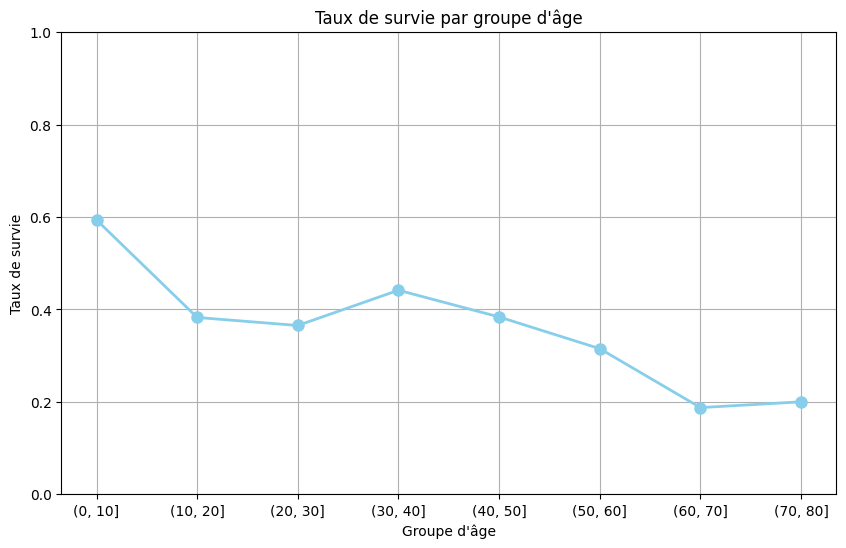

In [56]:
# Créer le graphique en lignes
plt.figure(figsize=(10, 6))
plt.plot(survival_rate_by_age_group.index.astype(str), survival_rate_by_age_group.values, marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8)
plt.title('Taux de survie par groupe d\'âge')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Taux de survie')
plt.ylim(0, 1)  # Les taux de survie sont entre 0 et 1
plt.grid(True)
plt.show()


''' Nous pouvons noté que la tranche d'âge de [0, 10] a plus survécue au naufrage du titanic que les autres groupes. Par contre les groupes d'âges situés entre [60, 70] et [70, 80] ont moins survécues.'''

### 6 - Analyse multivariée

###### Analysez les relations entre plusieurs variables :

<Figure size 1200x800 with 0 Axes>

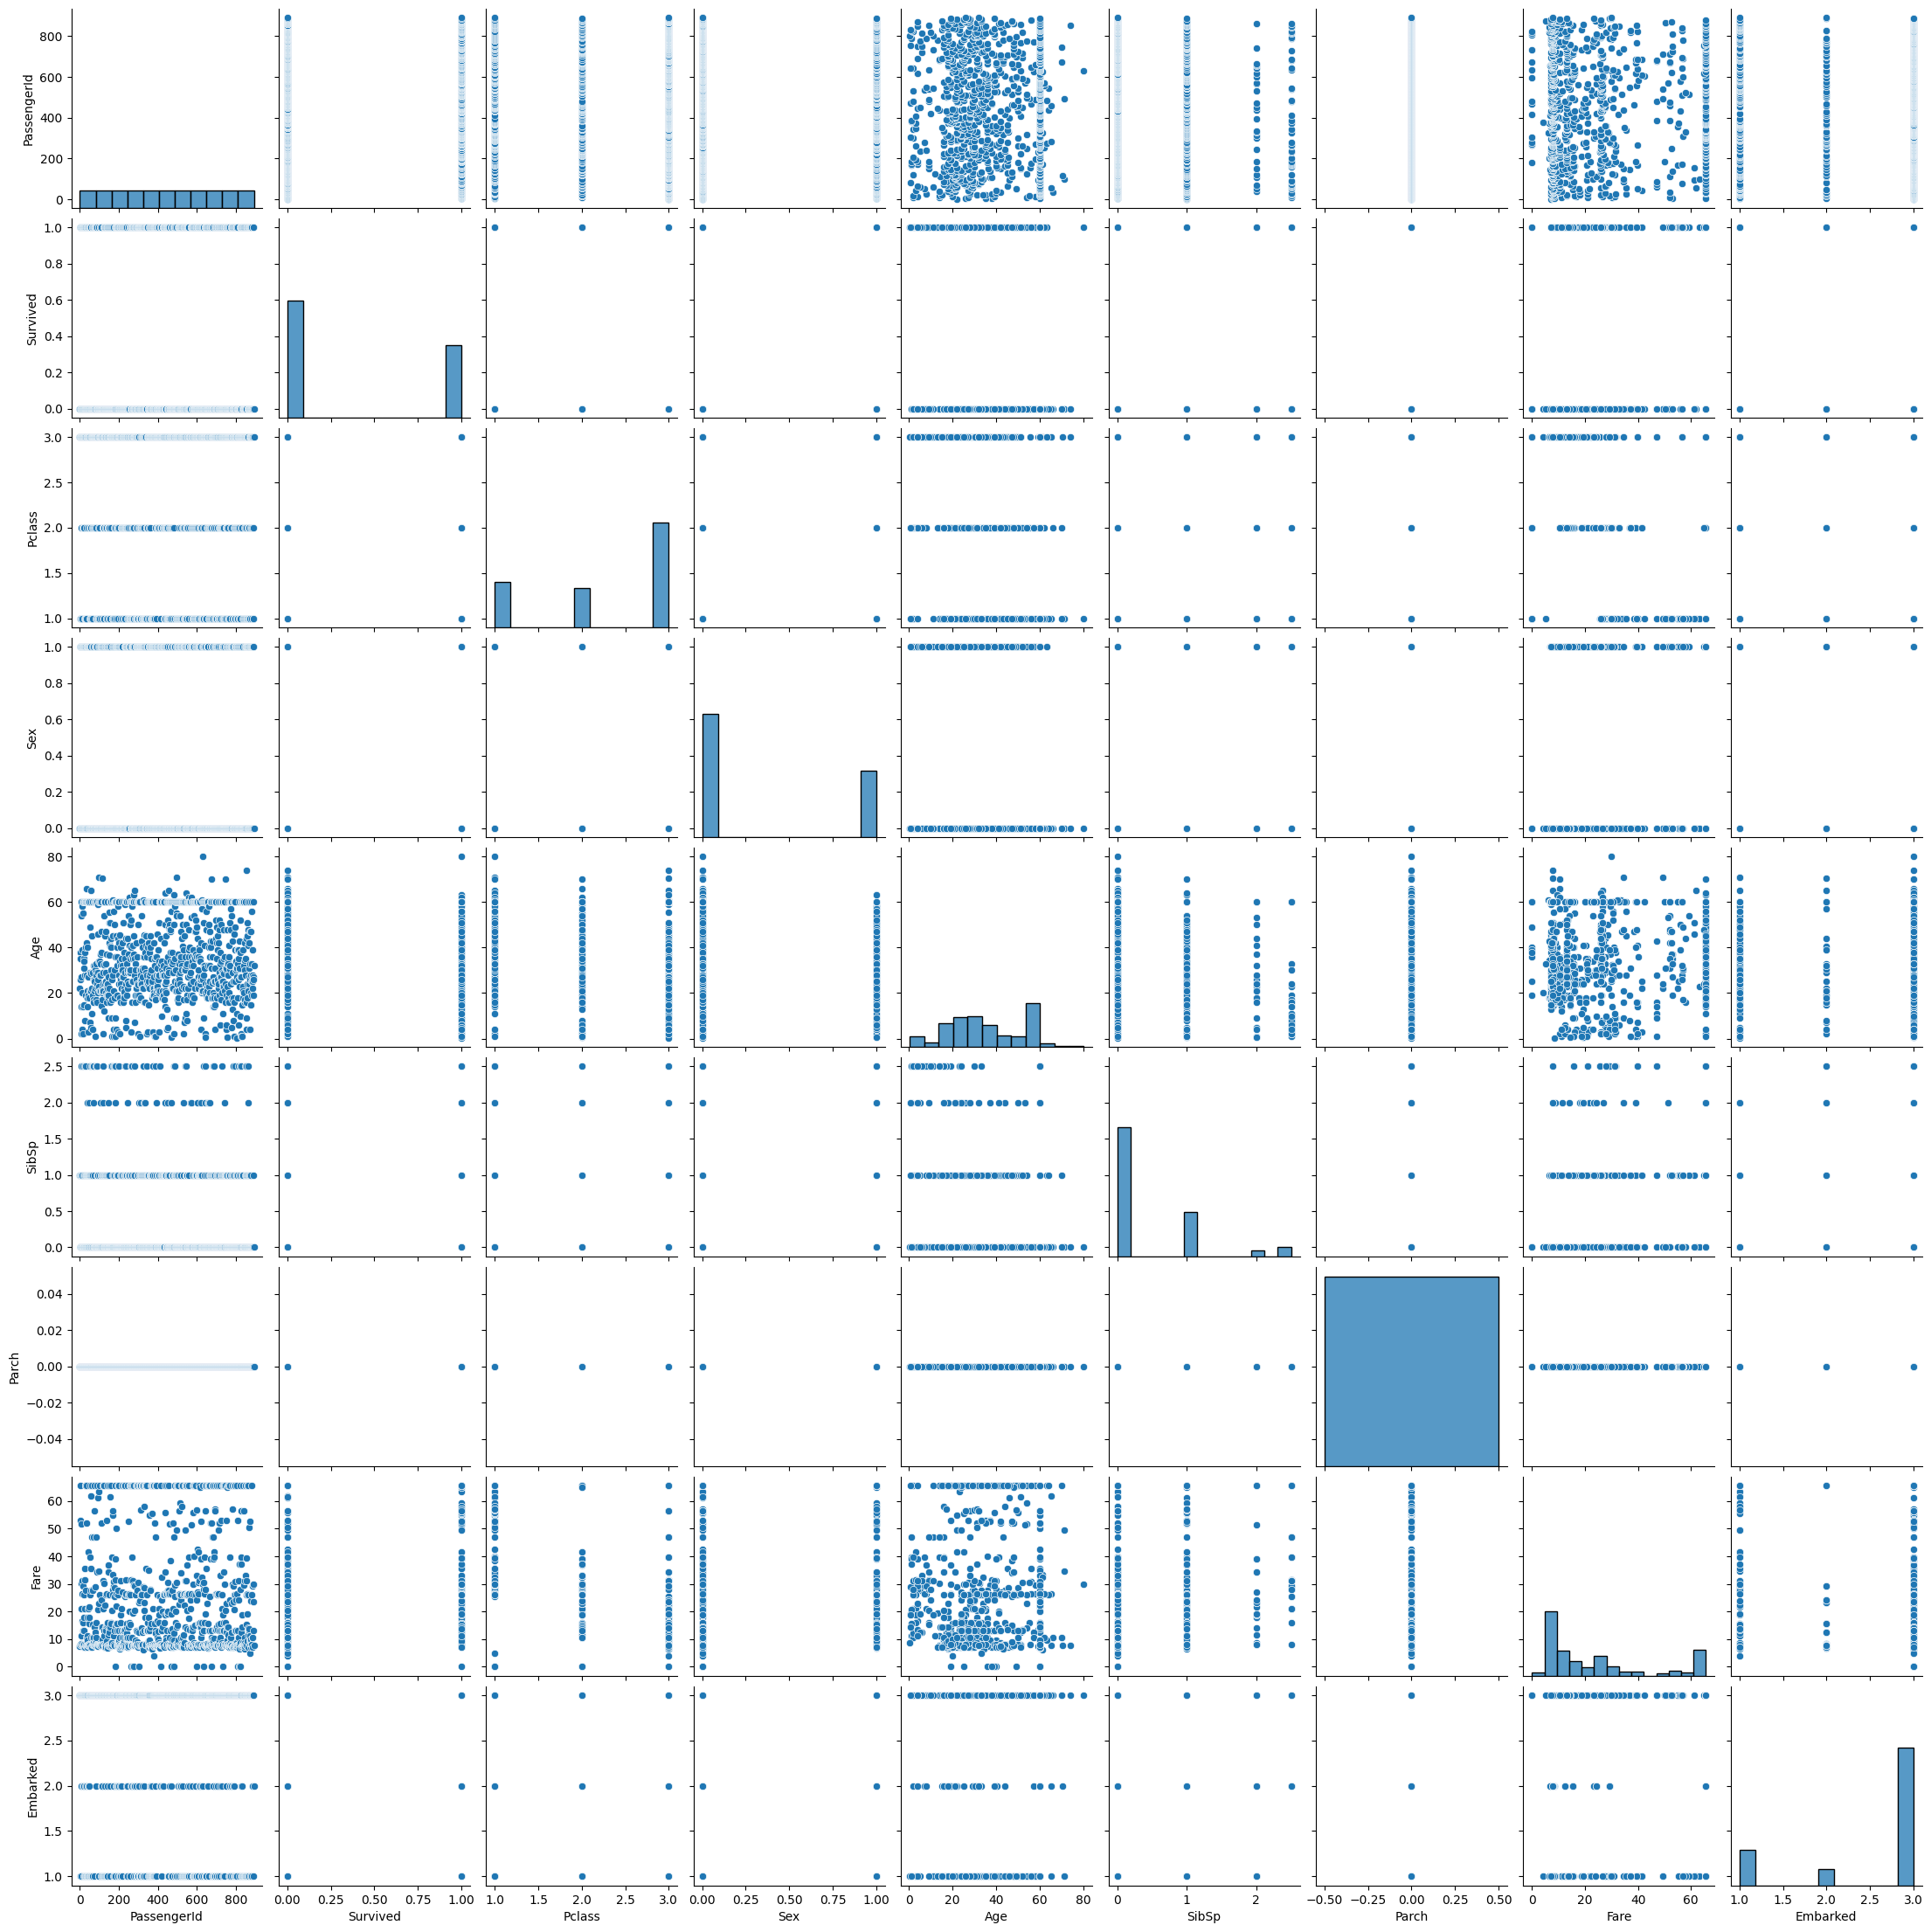

In [60]:
import seaborn as sns 
# Utiliser seaborn pour créer un pairplot
sns.pairplot(df)
    
# Afficher le graphique
plt.show()

##### Analyse multivariée avec SEABORN
###### Obervation de relation entre plusieurs variables

In [61]:
# Convertir les colonnes catégorielles en numériques
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Sélectionner les colonnes pour le pairplot
columns = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex']
data = df[columns]

# Nombre de variables
n_vars = len(columns)

# Créer une figure et des axes
fig, axes = plt.subplots(n_vars, n_vars, figsize=(15, 15))

In [62]:
# Parcourir chaque combinaison de variables
for i in range(n_vars):
    for j in range(n_vars):
        ax = axes[i, j]
        if i == j:
            # Histogramme pour les variables diagonales
            ax.hist(data[columns[i]].dropna(), bins=20, color='skyblue', edgecolor='black')
        else:
            # Scatter plot pour les autres combinaisons de variables
            ax.scatter(data[columns[j]], data[columns[i]], alpha=0.5, color='skyblue', edgecolor='black')
        
        # Étiquettes pour les axes
        if j == 0:
            ax.set_ylabel(columns[i])
        if i == n_vars - 1:
            ax.set_xlabel(columns[j])

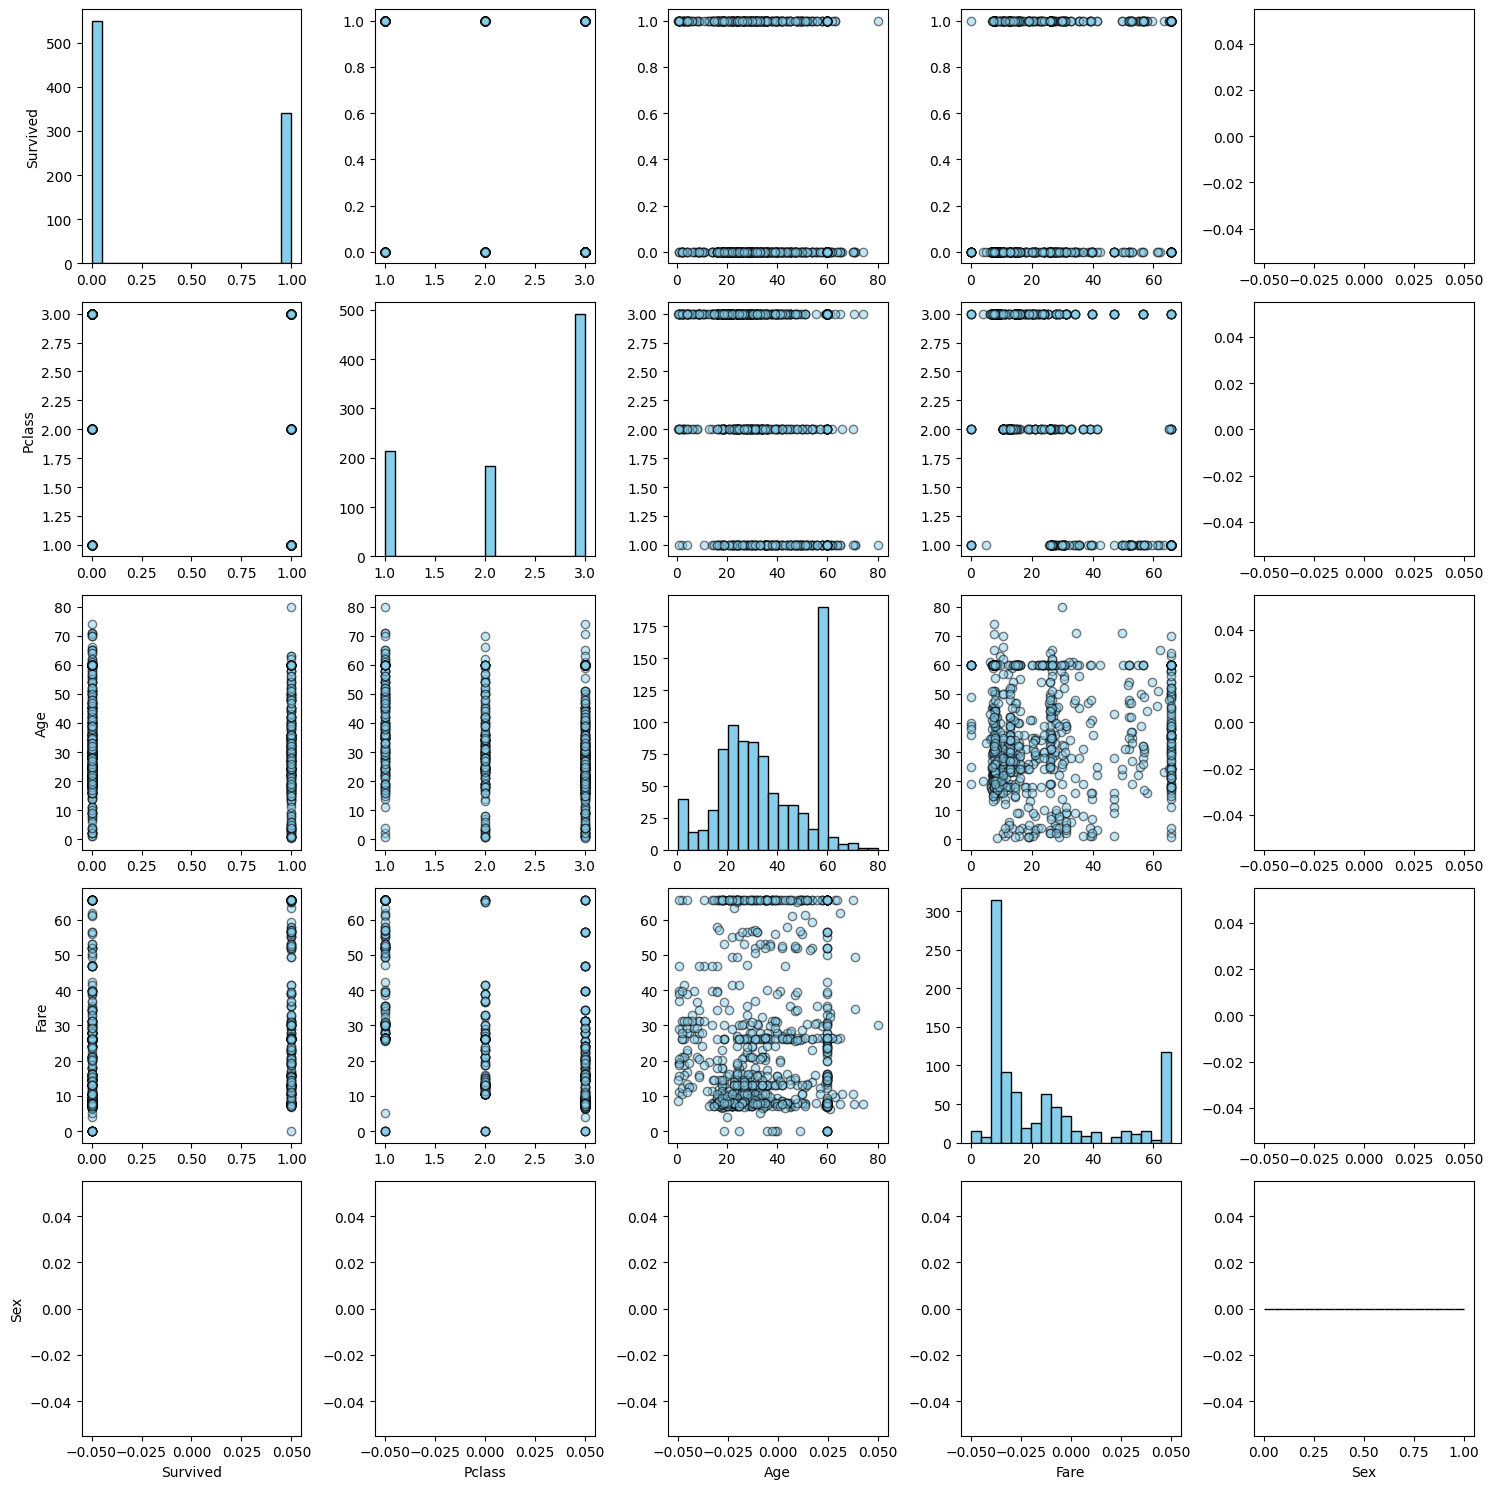

In [63]:
# Ajuster les espaces entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

#### Analyse multivariée avec MATPLOTLIB